In [1]:
import pandas as pd
import numpy as np
import requests
import json
import xmltodict
from rdkit import Chem
from mordred import Calculator, descriptors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Učitavanje podataka

In [3]:
data = pd.read_csv('./data/dopamine.csv', index_col=0)
data

,ChEMBL_ID,pIC50
0,CHEMBL303519,5.01
1,CHEMBL292943,7.30
2,CHEMBL61682,7.60
3,CHEMBL64487,6.44
4,CHEMBL64597,6.52
...,...,...
474,CHEMBL3805434,7.42
475,CHEMBL3805327,7.23
476,CHEMBL3805262,5.80
477,CHEMBL3805515,6.70


### 2. Dohvaćanje SMILES zapisa

Retrieve SMILES representation for each molecule using the ChEMBL REST API through your Python environment.

Make SMILES canonical by using rdkit Python package.

In [4]:
smiles = []
for mol_id in data.ChEMBL_ID:
    response = requests.get(f'https://www.ebi.ac.uk/chembl/api/data/molecule/{mol_id}')
    smiles.append(Chem.CanonSmiles(xmltodict.parse(response.text)['molecule']['molecule_structures']['canonical_smiles']))
data['smiles'] = smiles
# data.to_csv('./data/temp.csv', index=False)

### 3. Računanje moleklularnih deskriptora
Calculate molecular descriptors by using Mordred Python package or some other available molecular descriptor calculator. Use all available 0D, 1D, 2D and 3D molecular descriptors


- trebalo bi ovo proučiti i skužiti što je; koja je razlika između 0D, 1D, 2D i 3D; kako implementirati svaki

- Iz nekog razloga _features.append(calc(Chem.MolFromSmiles(sm))[:])_ ne daje grešku, a _features.append(calc(Chem.MolFromSmiles(sm)))_ daje. (???)

In [5]:
calc = Calculator(descriptors, ignore_3D=True)
features = []

for sm in smiles:
    features.append(calc(Chem.MolFromSmiles(sm))[:])
data['features'] = features
# data.to_csv('./data/temp.csv', index=False)

c:\Users\afs\anaconda3\envs\oldPy36\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### 4. Čišćenje podataka
Clean the transformed data of missing values and outliers. Remove duplicates.

- Čini mi se da nema duplikata, niti nedostajućih vrijednosti.
- Kako definiramo outliere? Na temelju čega?

In [39]:
data.isnull().sum()

ChEMBL_ID    0
pIC50        0
smiles       0
features     0
dtype: int64

In [ ]:
data['smiles'].duplicated().sum()

0

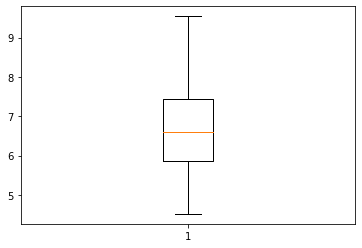

In [ ]:
# boxplot značajke koju bismo trebali predvidjeti
# nema outliera (?)
plt.boxplot(data['pIC50'])
plt.show()

### 5. Splitting
Split the preprocessed dataset into subset for training and subset for testing in ratio 75:25. If using deep learning, split into subset for validation as well (ratio 70:15:15)

In [ ]:
train, test = train_test_split(data, test_size=0.25)

train_DL, test_DL = train_test_split(data, test_size=0.3)
validate_DL, test_DL = train_test_split(test_DL, test_size=0.5)


### 6. Skaliranje podataka
Define and initialize scaler by using Scikit-learn Python package. Scale the data appropriately.

- https://scikit-learn.org/1.5/modules/preprocessing.html -> trebalo bi proučiti i odabrati scaler na temelju značajki (?)